# Examples of image operators in torchvision.transforms

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
import torch.utils.data
import torchvision
from torchvision import datasets, transforms

## 1. Load MNIST as-is (no transforms)

In [2]:
mnist = datasets.MNIST(
    '../data',
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()]))

mnist

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../data
    Transforms (if any): Compose(
                             ToTensor()
                         )
    Target Transforms (if any): None

In [3]:
loader_mnist = torch.utils.data.DataLoader(mnist, batch_size=10, shuffle=False)
loader_mnist

0 torch.Size([10, 1, 28, 28]) torch.Size([10])


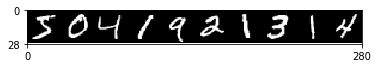

1 torch.Size([10, 1, 28, 28]) torch.Size([10])


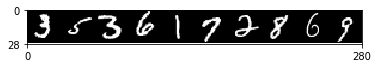

2 torch.Size([10, 1, 28, 28]) torch.Size([10])


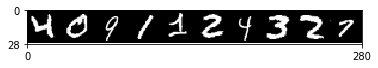

In [4]:
for i_batch, batch in enumerate(loader_mnist):
    print(i_batch, batch[0].size(), batch[1].size())
    images, labels = batch[0], batch[1]
    grid = torchvision.utils.make_grid(images, nrow=10, padding=0)
    plt.imshow(grid.permute((1, 2, 0)))
    plt.xticks([0, grid.shape[2]])
    plt.yticks([0, grid.shape[1]])
    plt.show()
    if i_batch == 2:
        break

## 2. Load MNIST and resize to (32, 32)

In [5]:
transforms_32 = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()])
transforms_32

Compose(
    Resize(size=(32, 32), interpolation=PIL.Image.BILINEAR)
    ToTensor()
)

In [6]:
mnist_32 = datasets.MNIST(
    '../data',
    train=True,
    download=True,
    transform=transforms_32)

mnist_32

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../data
    Transforms (if any): Compose(
                             Resize(size=(32, 32), interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                         )
    Target Transforms (if any): None

In [7]:
loader_mnist_32 = torch.utils.data.DataLoader(mnist_32, batch_size=10, shuffle=False)
loader_mnist_32

0 torch.Size([10, 1, 32, 32]) torch.Size([10])


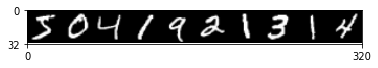

1 torch.Size([10, 1, 32, 32]) torch.Size([10])


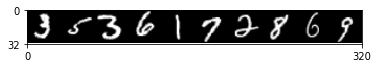

2 torch.Size([10, 1, 32, 32]) torch.Size([10])


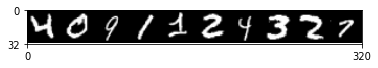

In [8]:
for i_batch, batch in enumerate(loader_mnist_32):
    print(i_batch, batch[0].size(), batch[1].size())
    images, labels = batch[0], batch[1]
    grid = torchvision.utils.make_grid(images, nrow=10, padding=0)
    plt.imshow(grid.permute((1, 2, 0)))
    plt.xticks([0, grid.shape[2]])
    plt.yticks([0, grid.shape[1]])
    plt.show()
    if i_batch == 2:
        break

## Junk

In [9]:
print(mpl.rcParams['figure.dpi'])

72.0
